<a href="https://colab.research.google.com/github/schneiderson/ATIT2-20/blob/main/intro/BinaryClassificationEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression - Evaluation

(based on Article: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)


In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, confusion_matrix

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

X.shape

(1000, 20)

In [62]:
np.bincount(y)
# this means there are 501 instances of class 0 and 499 instances of class 1
# hence the majority class is 0

array([501, 499])

In [63]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_preds = [0 for _ in range(len(testy))]

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

# predict probabilities
lr_probs = model.predict_proba(testX)

lr_probs[0]

array([0.00402732, 0.99597268])

In [64]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs[0]

0.9959726848561301

In [99]:
# You can play with this threshold to see how it effects the performance metrics
threshold = 0.5                 # threshold/decision boundary
lr_preds = lr_probs > threshold

# You can play with this threshold to see how it effects the performance metrics
threshold2 = 0.8                 # threshold/decision boundary
lr_preds2 = lr_probs > threshold2




---



---



## Confusion matrix

#### Majority classifier

[Text(33.0, 0.5, 'Actual'), Text(0.5, 15.0, 'Predicted')]

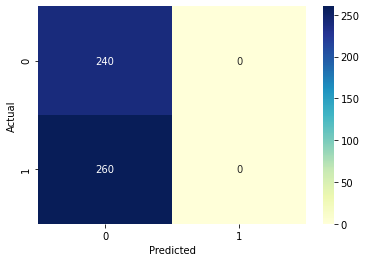

In [92]:
maj_conf_mat = confusion_matrix(testy, ns_preds)

ax = plt.subplot()
sns.heatmap(maj_conf_mat, annot=True, cmap="YlGnBu", ax = ax, fmt="d")
ax.set(ylabel="Actual", xlabel="Predicted")

#### Logistic Regression


Text(0.5, 1.0, 'Threshold 2')

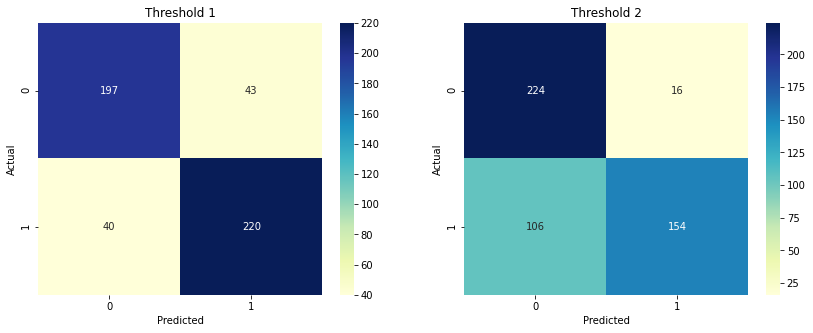

In [115]:
lin_reg_conf_mat = confusion_matrix(testy, lr_preds)
lin_reg_conf_mat2 = confusion_matrix(testy, lr_preds2)

f, ax = plt.subplots(1,2, figsize=(14, 5))
sns.heatmap(lin_reg_conf_mat, annot=True, cmap="YlGnBu", ax = ax[0], fmt="d")
ax[0].set(ylabel="Actual", xlabel="Predicted")
ax[0].set_title("Threshold 1")

sns.heatmap(lin_reg_conf_mat2, annot=True, cmap="YlGnBu", ax = ax[1], fmt="d")
ax[1].set(ylabel="Actual", xlabel="Predicted")
ax[1].set_title("Threshold 2")




---



---



## Accuracy


#### Majority classifier

In [120]:
maj_acc = accuracy_score(testy, ns_preds)
maj_acc

0.48

#### Logistic Regression

In [121]:
lr_acc = accuracy_score(testy, lr_preds)
lr_acc2 = accuracy_score(testy, lr_preds2)
lr_acc

0.834

comparison:

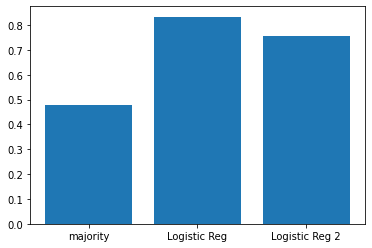

In [123]:
plt.bar([0, 1, 2], [maj_acc, lr_acc, lr_acc2])
plt.xticks([0,1,2], ("majority", "Logistic Reg", "Logistic Reg 2"))
plt.show()





---



---



## Precision

#### Majority classifier

In [124]:
maj_prec = precision_score(testy, ns_preds)
maj_prec

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

#### Logistic Regression

In [125]:
lr_prec = precision_score(testy, lr_preds)
lr_prec2 = precision_score(testy, lr_preds2)
lr_prec



0.8365019011406845

Comparison

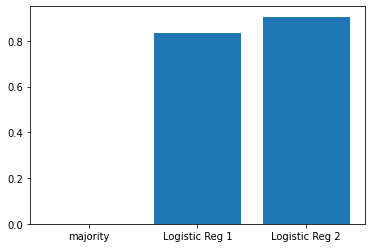

In [126]:
plt.bar([0, 1, 2], [maj_prec, lr_prec, lr_prec2])
plt.xticks([0,1,2], ("majority", "Logistic Reg 1", "Logistic Reg 2"))
plt.show()




---



---



## Recall

#### Majority classifier

In [80]:
maj_rec = recall_score(testy, ns_preds)
maj_rec

0.0

#### Logistic Regression

In [127]:
lr_rec = recall_score(testy, lr_preds)
lr_rec2 = recall_score(testy, lr_preds2)
lr_rec

0.8461538461538461

comparison

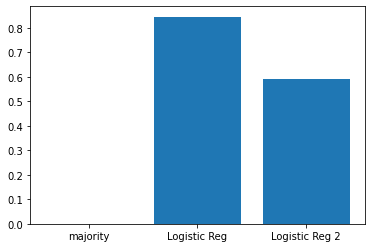

In [128]:
plt.bar([0, 1, 2], [maj_rec, lr_rec, lr_rec2])
plt.xticks([0,1,2], ("majority", "Logistic Reg", "Logistic Reg 2"))
plt.show()




---



---



## ROC & AUC


#### Majority classifier

In [130]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
ns_auc

0.5

#### Logistic Regression

In [131]:
lr_auc = roc_auc_score(testy, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
lr_auc

0.9028205128205128

comparison


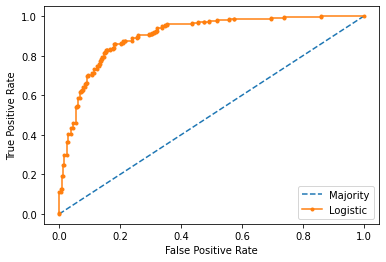

In [133]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Majority')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()